In [2]:
import os
import ast
import json
import numpy as np
import pandas as pd
from sklearn.metrics import average_precision_score, recall_score, precision_score, classification_report
from detection_utils.metrics import IoU, generate_report, matrix_from_df, class_report, precision, recall 
import matplotlib.pyplot as plt

In [ ]:
%cd ..

In [4]:
def avg_IoU(df:pd.DataFrame):
    return df['iou'].mean()
        

def val_report(modelname):
    df = pd.read_csv(os.path.join('workspace', 'exported_models', modelname, 'validation_results.csv'))
    iou_pd = pd.read_csv(os.path.join('workspace', 'exported_models', modelname, 'iou_results.csv'))
    df['boxes'] = [*map(ast.literal_eval, df['boxes'].tolist())]
    df['original_class'] = [*map(lambda z: z[:-9], df['image'].tolist())]
    df['best_class'] = df['best_class'].astype(str)
    df.loc[df['best'].isna(), ['best_class']] = '-'
    yt, yp = matrix_from_df(df)
    report = class_report(yt,yp)
    pr = precision(report)
    rc = recall(report)
    details = generate_report(pr, rc)
    details['avg iou'] = avg_IoU(iou_pd)
    return pd.DataFrame([details], index=[modelname])


In [1]:
df = pd.read_csv(os.path.join('workspace', 'exported_models', 'sample_model', 'validation_results.csv'))
df['boxes'] = [*map(ast.literal_eval, df['boxes'].tolist())]
df['original_class'] = [*map(lambda z: z[:-9], df['image'].tolist())]
df['best_class'] = df['best_class'].astype(str)
df.loc[df['best'].isna(), ['best_class']] = '-'
df

NameError: name 'pd' is not defined

In [5]:
yt, yp = matrix_from_df(df)

In [6]:
print(classification_report(yt, yp, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         5
          17       0.04    

In [6]:
val_report("sample_model")

,precision weighted,precision macro,recall weighted,recall macro,avg iou
sample_model,0.985333,0.985333,0.984,0.984,0.96118


In [6]:
report = class_report(yt,yp)

In [7]:
pr = precision(report)
rc = recall(report)

In [45]:
pd.DataFrame([generate_report(pr, rc)], index=['sample_model'])

,precision weighted,precision macro,recall weighted,recall macro
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8,0.000808,0.000792,0.016,0.015686


In [61]:
models = [*filter(lambda z: os.path.exists(os.path.join("workspace", "exported_models", z, "validation_results.csv")) and os.path.exists(os.path.join("workspace", "exported_models", z, "iou_results.csv")), os.listdir(os.path.join("workspace", "exported_models")))]

In [62]:
final_df = pd.concat([*map(val_report, models)])

In [63]:
final_df

,precision weighted,precision macro,recall weighted,recall macro,avg iou
efficientdet_d0_coco17_tpu-32,0.080211,0.080211,0.096,0.096000,0.466367
faster_rcnn_resnet152_v1_640x640_coco17_tpu-8,0.001281,0.001256,0.028,0.027451,0.672157
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8,0.005381,0.005275,0.044,0.043137,0.869612
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8,0.001212,0.001188,0.016,0.015686,0.864990
ssd_resnet152_v1_fpn_640x640_coco17_tpu-8,0.016252,0.015933,0.052,0.050980,0.772909
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8,0.000808,0.000792,0.016,0.015686,0.170810
yolov8m_lego_416_bsize_16,0.996667,0.996667,0.996,0.996000,0.962096
yolov8n_lego_416_bsize_1,0.431012,0.422561,0.424,0.415686,0.849174
yolov8n_lego_416_bsize_16,0.978667,0.978667,0.976,0.976000,0.961230
yolov8n_lego_416_bsize_32,0.985333,0.985333,0.984,0.984000,0.961180


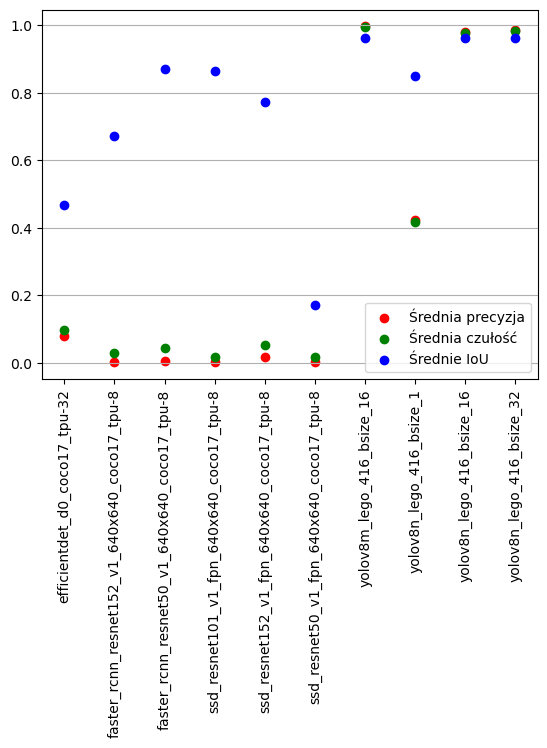

In [79]:
plt.scatter(final_df.index, final_df['precision macro'], label="Średnia precyzja", color='r')
plt.scatter(final_df.index, final_df['recall macro'], label="Średnia czułość", color='g')
plt.scatter(final_df.index, final_df['avg iou'], label="Średnie IoU", color='b')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend()
plt.show()